## Initialization of all classes & class methods


In [2]:
# Import packages

import importlib

import SIM0
import SIM1
import SIM2
import SIM3
import Partners
import SIM1_test
import Enablements
import KPI

importlib.reload(SIM0)
importlib.reload(SIM1)
importlib.reload(SIM2)
importlib.reload(SIM3)
importlib.reload(SIM1_test)
importlib.reload(Partners)
importlib.reload(Enablements)
importlib.reload(KPI)


<module 'KPI' from '/Users/moritz/Desktop/Work Project (NOVA - Celfocus)/Simulation & Testing FINAL2/KPI.py'>

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
from SIM0 import Sim_0
from SIM1 import Sim_1
from SIM2 import Sim_2
from SIM3 import Sim_3
from SIM1_test import Sim_12
from Partners import PartnerData
from Enablements import run_sim_0, run_sim_1, get_average_metrics, average_dicts, run_simulations
from KPI import KPI_calcs

In [4]:
partner_metrics_baseline, monthly_customer_counts_0 = Sim_0.run_baseline(100, PartnerData.reset_partners_initial())


In [5]:
partner_metrics_baseline

{'Partner 1': {'Purchases Per Month': [10,
   7,
   13,
   12,
   12,
   9,
   6,
   10,
   5,
   6,
   15,
   9],
  'Unique Customers Per Month': [9, 7, 11, 12, 12, 9, 6, 9, 5, 6, 15, 8],
  'Total Sales Per Month': [1580.6612277307809,
   1079.218683409225,
   1846.2774045339193,
   2008.0028944155629,
   2161.6009587424173,
   1482.0669315888936,
   697.271683478832,
   1839.4379108943217,
   688.9622843706447,
   973.0822043674929,
   2186.084612577112,
   1446.2663192798498],
  'Average Basket Value Per Month': [158.0661227730781,
   154.17409762988927,
   142.02133881030147,
   167.33357453463023,
   180.13341322853478,
   164.67410350987706,
   116.211947246472,
   183.94379108943218,
   137.79245687412896,
   162.18036739458213,
   145.73897417180746,
   160.6962576977611]},
 'Partner 2': {'Purchases Per Month': [9,
   5,
   9,
   5,
   12,
   10,
   6,
   10,
   12,
   9,
   13,
   8],
  'Unique Customers Per Month': [9, 5, 8, 5, 12, 10, 6, 10, 12, 8, 11, 8],
  'Total Sales Per

## Monte Carlo Simulation

In [6]:
import numpy as np
import random

iterations = 10
customer_count = 500


In [7]:

sim_0_metrics = {}
sim_1_metrics = {}
sim_2_metrics = {}
sim_3_metrics = {}

# Initialize an empty dictionary to store monthly tokens redeemed for each model
monthly_tokens_redeemed_records = {
    "Sim_1": [],
    "Sim_2": [],
    "Sim_3": []
}

cltv_records = {
    "Sim_1": [],
    "Sim_2": [],
    "Sim_3": []
}

for partner in ['Partner 1', 'Partner 2', 'Partner 3', 'Partner 4']:
    sim_0_metrics[partner] = {
        'Purchases Per Month': [],
        'Unique Customers Per Month': [],
        'Total Sales Per Month': [],
        'Average Basket Value Per Month': []
    }
    sim_1_metrics[partner] = {
        'Purchases Per Month': [],
        'Unique Customers Per Month': [],
        'Total Sales Per Month': [],
        'Average Basket Value Per Month': []
    }
    sim_2_metrics[partner] = {
        'Purchases Per Month': [],
        'Unique Customers Per Month': [],
        'Total Sales Per Month': [],
        'Average Basket Value Per Month': []
    }
    sim_3_metrics[partner] = {
        'Purchases Per Month': [],
        'Unique Customers Per Month': [],
        'Total Sales Per Month': [],
        'Average Basket Value Per Month': []
    }




In [8]:


for _ in range(iterations):
    # Set seed and run Sim_0
    seed = random.randint(0,1000000000)
    print(seed)
    np.random.seed(seed)
    random.seed(seed)
    partner_metrics_baseline, monthly_customer_counts_0 = Sim_0.run_baseline(customer_count, PartnerData.reset_partners_initial())

    # Extract and store metrics for each partner from Sim_0
    for partner in sim_0_metrics.keys():
        sim_0_partner_metrics = partner_metrics_baseline[partner]
        for key in sim_0_metrics[partner].keys():
            sim_0_metrics[partner][key].append(sim_0_partner_metrics[key])


    # Set seed again and run Sim_1
    np.random.seed(seed)
    random.seed(seed)
    total_tokens_redeemed_1, tier_distribution_1, partner_metrics_sim_1, wallet_values, average_wallet_value_1, customer_savings_1, monthly_customer_counts_1 = Sim_1.run_simulation(customer_count, PartnerData.reset_partners_initial())


    # Extract and store metrics for each partner from Sim_1
    for partner in sim_1_metrics.keys():
        sim_1_partner_metrics = partner_metrics_sim_1[partner]
        for key in sim_1_metrics[partner].keys():
            sim_1_metrics[partner][key].append(sim_1_partner_metrics[key])

    # Extract monthly tokens redeemed for Sim_0 and store it in the records
    monthly_tokens_redeemed_sim_1 = KPI_calcs.extract_monthly_tokens_redeemed(partner_metrics_sim_1)
    monthly_tokens_redeemed_records["Sim_1"].append(monthly_tokens_redeemed_sim_1)


    # Set seed again and run Sim_2
    np.random.seed(seed)
    random.seed(seed)
    total_tokens_redeemed_2, tier_distribution_2, partner_metrics_sim_2, wallet_values_2, average_wallet_value_2, customer_savings_2, pos_rewards_2, monthly_token_values_2, monthly_token_supply_2, monthly_token_circulation_2, monthly_customer_counts_2 = Sim_2.run_simulation(customer_count, PartnerData.reset_partners_initial())


    # Extract and store metrics for each partner from Sim_2
    for partner in sim_2_metrics.keys():
        sim_2_partner_metrics = partner_metrics_sim_2[partner]
        for key in sim_1_metrics[partner].keys():
            sim_2_metrics[partner][key].append(sim_2_partner_metrics[key])

    # Extract monthly tokens redeemed for Sim_0 and store it in the records
    monthly_tokens_redeemed_sim_2 = KPI_calcs.extract_monthly_tokens_redeemed(partner_metrics_sim_2)
    monthly_tokens_redeemed_records["Sim_2"].append(monthly_tokens_redeemed_sim_2)


    # Set seed again and run Sim_3
    np.random.seed(seed)
    random.seed(seed)
    total_tokens_redeemed_3, tier_distribution_3, partner_metrics_sim_3, wallet_values_3, average_wallet_value_3, customer_savings_3, token_spending_metrics_3, monthly_customer_counts_3, monthly_central_token_values_3 = Sim_3.run_simulation(customer_count, PartnerData.reset_partners_initial())

    # Extract and store metrics for each partner from Sim_3
    for partner in sim_3_metrics.keys():
        sim_3_partner_metrics = partner_metrics_sim_3[partner]
        for key in sim_1_metrics[partner].keys():
            sim_3_metrics[partner][key].append(sim_3_partner_metrics[key])

    # Extract monthly tokens redeemed for Sim_0 and store it in the records
    monthly_tokens_redeemed_sim_3 = KPI_calcs.extract_monthly_tokens_redeemed(partner_metrics_sim_3)
    monthly_tokens_redeemed_records["Sim_3"].append(monthly_tokens_redeemed_sim_3)



170863564
426660519
915672998
339731135
783576746
126044823
894845181
447504967
917844261
787636686


In [9]:
def compute_monthly_averages(data):
    averages = {}
    for partner, metrics in data.items():
        partner_averages = {}
        for metric, monthly_values in metrics.items():
            monthly_averages = [0] * 12  # Initialize a list of 12 zeros
            for iteration_values in monthly_values:
                for i in range(12):  # Iterate over each month
                    monthly_averages[i] += iteration_values[i]
            monthly_averages = [value / len(monthly_values) for value in monthly_averages]  # Calculate average for each month
            partner_averages[metric] = monthly_averages
        averages[partner] = partner_averages
    return averages

partner_metrics_baseline = compute_monthly_averages(sim_0_metrics)

## KPIs

### General KPI

In [10]:
# Model 1,2,3 Total  Sales in 12 months
print(f"Model 1:{(KPI_calcs.calculate_average_sales_with_ci(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_average_sales_with_ci(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_average_sales_with_ci(sim_3_metrics))}\n")

# Model 1,2,3 Total  Number of Purchases in 12 months

print(f"Model 1:{(KPI_calcs.calculate_average_purchases_with_ci(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_average_purchases_with_ci(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_average_purchases_with_ci(sim_3_metrics))}\n")


# Model 1,2,3 Total  Number of Unique Customers in 12 months
print(f"Model 1:{(KPI_calcs.calculate_average_customers_with_ci(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_average_customers_with_ci(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_average_customers_with_ci(sim_3_metrics))}\n")

Model 1:(411601.6438683094, array([396225.13389152, 426198.82701327]))

Model 2:(448857.83152756945, array([430600.20655434, 467373.16042741]))

Model 3:(420707.6642854413, array([390209.58720241, 451032.30309892]))

Model 1:(3844.8, array([3711.5, 3971.9]))

Model 2:(4186.1, array([4036.2  , 4332.905]))

Model 3:(3965.7, array([3695.6, 4224.3]))

Model 1:(3331.2, array([3232.7, 3425.3]))

Model 2:(3639.8, array([3524.685, 3757.705]))

Model 3:(3345.6, array([3169.895, 3519.605]))



### Customer Retention


In [11]:
# Model 1,2,3 Frequency Changes
print(f"Model 1:{(KPI_calcs.calculate_frequency_change_with_ci(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_frequency_change_with_ci(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_frequency_change_with_ci(sim_3_metrics))}\n")

# Model 1,2,3 Spending Changes
print(f"Model 1:{(KPI_calcs.calculate_spending_change_with_ci(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_spending_change_with_ci(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_spending_change_with_ci(sim_3_metrics))}\n")

Model 1:(0.16319213516565328, -0.20246828576255005, 0.5342332408309562)

Model 2:(0.046407884285081885, -0.500334700673201, 0.7162339860578603)

Model 3:(-0.1447299260824095, -0.7387626642032853, 0.38452461164424745)

Model 1:(1.304258035935035, -1.1297263595797362, 3.7144285589219863)

Model 2:(0.9433356949646017, -1.0542738251655246, 3.139030116715277)

Model 3:(0.8558608226362528, -1.1401247662477343, 3.4852816283381913)



### Calculate NPVs

In [12]:
# Model 1,2,3
print(f"Model 1:{(KPI_calcs.calculate_npv_with_ci(sim_1_metrics,partner_metrics_baseline,monthly_tokens_redeemed_sim_1))}\n")
print(f"Model 2:{(KPI_calcs.calculate_npv_with_ci(sim_2_metrics,partner_metrics_baseline,monthly_tokens_redeemed_sim_2))}\n")
print(f"Model 3:{(KPI_calcs.calculate_npv_with_ci(sim_3_metrics,partner_metrics_baseline,monthly_tokens_redeemed_sim_3))}\n")

IndexError: list index out of range

### Calculate System Equities

In [13]:
# Model 1,2,3
print(f"Model 1:{(KPI_calcs.calculate_system_equity_new(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_system_equity_new(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_system_equity_new(sim_3_metrics))}\n")


# computed as the sum of absolute differences of each partner's growth rate from the overall average growth rate.

Model 1:(({'Partner 1': 5.706467795782195, 'Partner 2': 6.134173245056759, 'Partner 3': 3.5963253100783965, 'Partner 4': 16.71875}, {'Partner 1': (1.5152599604365278, 9.796947262182195), 'Partner 2': (2.5114182167569687, 9.790643196183723), 'Partner 3': (1.6041677314670222, 5.622067228503357), 'Partner 4': (-1.1119791666666672, 35.7126736111111)}), (7.753676757279128, (3.5235722775477725, 12.25665326642977)), (3.192574252914848, (1.58923346338654, 5.742010048965099)))

Model 2:(({'Partner 1': 5.57683994261694, 'Partner 2': 5.88325925777163, 'Partner 3': 4.181396232240663, 'Partner 4': 23.1328320802005}, {'Partner 1': (2.487157608302852, 8.849530099435059), 'Partner 2': (2.5666508321503567, 9.371076709095538), 'Partner 3': (1.9191264172432367, 6.450360503057478), 'Partner 4': (3.051002506265659, 44.07067669172931)}), (9.219255400490031, (4.64746389542745, 14.161850610267148)), (3.4054784545486965, (1.5750586011979903, 6.734975104128087)))

Model 3:(({'Partner 1': 4.234288396293766, 'Par

### Calculate CLTVs

In [14]:
# Model 1,2,3
print(f"Baseline:{(KPI_calcs.calculate_total_cltv_annual(sim_0_metrics))}\n")
print(f"Model 1:{(KPI_calcs.calculate_total_cltv_annual(sim_1_metrics))}\n")
print(f"Model 2:{(KPI_calcs.calculate_total_cltv_annual(sim_2_metrics))}\n")
print(f"Model 3:{(KPI_calcs.calculate_total_cltv_annual(sim_3_metrics))}\n")



Baseline:2378.3302745955725

Model 1:2471.1914257223198

Model 2:2466.3873373678166

Model 3:2514.9908194969



## Plot Aggregated Partner Metrics by Model

In [15]:
import numpy as np
from scipy.stats import t

def aggregate_and_compute_confidence_for_models(*metrics_data_dicts):
    results_for_models = {}

    for model_idx, metrics_data_dict in enumerate(metrics_data_dicts, start=1):
        results = {}

        # Assuming all dictionaries have the same metrics
        first_partner_metrics = next(iter(metrics_data_dict.values()))
        for metric in first_partner_metrics:  
            month_wise_data = [[] for _ in range(12)]  # List to store data for each month

            # Aggregate data month-wise for each metric
            for partner_data in metrics_data_dict.values():
                for month_idx in range(12):
                    for iteration_data in partner_data[metric]:
                        month_wise_data[month_idx].append(iteration_data[month_idx])

            # Compute mean and confidence interval for each month
            month_wise_results = []
            for month_data in month_wise_data:
                mean = np.mean(month_data)
                std = np.std(month_data, ddof=1)  # ddof=1 for sample standard deviation
                ci = 1.96 * std / np.sqrt(len(month_data))  # 95% CI using 1.96 Z-score
                month_wise_results.append((mean, mean - ci, mean + ci))

            results[metric] = month_wise_results

        model_name = f"Model{model_idx}"
        results_for_models[model_name] = results

    return results_for_models

In [16]:
results_for_models = aggregate_and_compute_confidence_for_models(sim_0_metrics, sim_1_metrics, sim_2_metrics, sim_3_metrics)

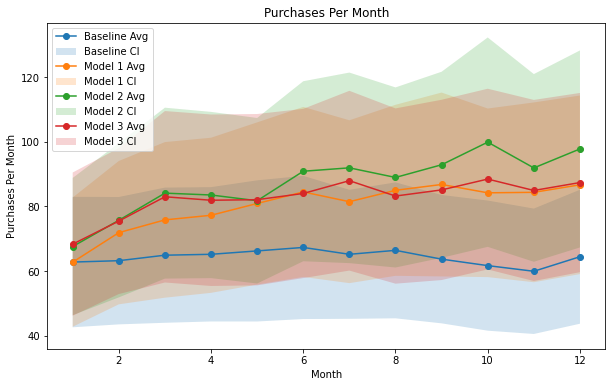

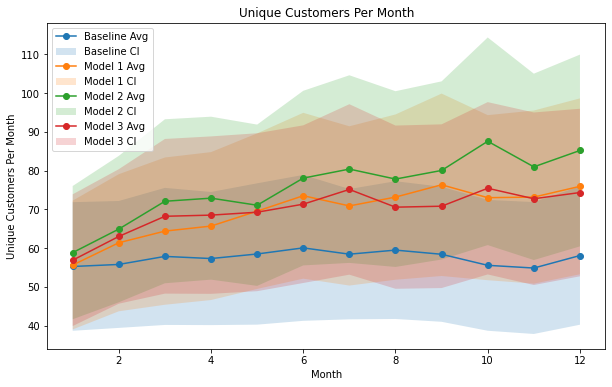

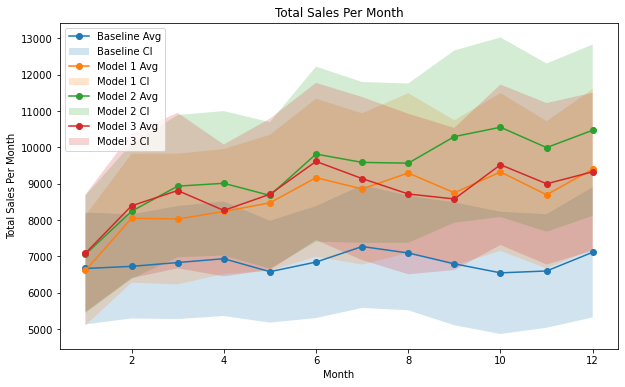

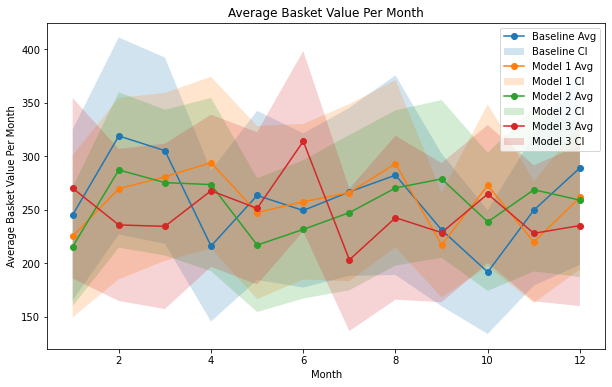

In [17]:
metrics = ['Purchases Per Month', 'Unique Customers Per Month', 'Total Sales Per Month', 'Average Basket Value Per Month']

# Mapping of model names
model_name_mapping = {
    'Model1': 'Baseline',
    'Model2': 'Model 1',
    'Model3': 'Model 2',
    'Model4': 'Model 3'
}

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Iterate through each model and plot its data
    for model, model_data in results_for_models.items():
        if metric in model_data:
            # Extracting averages and confidence intervals
            averages = [tup[0] for tup in model_data[metric]]
            lower_cis = [tup[1] for tup in model_data[metric]]
            upper_cis = [tup[2] for tup in model_data[metric]]
            months = range(1, 13)  # Assuming data for 12 months

            # Plotting the averages with markers
            plt.plot(months, averages, label=f'{model_name_mapping.get(model, model)} Avg', marker='o')

            # Plotting the confidence intervals
            plt.fill_between(months, lower_cis, upper_cis, alpha=0.2, label=f'{model_name_mapping.get(model, model)} CI')

    plt.title(f'{metric}')
    plt.xlabel('Month')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [18]:
# Initialize an empty dictionary to store the aggregated data
aggregated_data_0 = {}

# Loop through each partner company in the initial data
for partner, metrics_data in sim_2_metrics.items():
    # Loop through each metric for the current partner
    for metric, monthly_data in metrics_data.items():
        if metric not in aggregated_data_0:
            aggregated_data_0[metric] = [0] * 12  # Initialize a list for the metric
        
        # Calculate the average for the current partner and metric
        partner_avg = [sum(month) / len(month) for month in monthly_data]
        
        # Add the partner's average to the aggregated data
        for month_idx in range(12):
            aggregated_data_0[metric][month_idx] += partner_avg[month_idx]

# Now, 'aggregated_data' is a dictionary with metrics as keys and aggregated averages
# for each month across all partner companies and across all metrics
print(aggregated_data_0)


IndexError: list index out of range

## Plot Metrics per Partner

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_sem(data):
    if len(data) > 1:  # Ensure there's more than one data point
        mean = np.mean(data)
        sem = np.std(data, ddof=1) / np.sqrt(len(data))
    else:  # Handle case with insufficient data
        mean = np.nan  # Not a number
        sem = np.nan
    return mean, sem

def calculate_monthly_mean_and_confidence_interval(data, confidence=0.95):
    means = []
    lower_cis = []
    upper_cis = []

    for month_idx in range(len(data[0])):
        # Extract data for the current month across all iterations
        monthly_data = [iteration[month_idx] for iteration in data]
        
        # Skip if monthly_data is not a list or is empty
        if not isinstance(monthly_data, list) or not monthly_data:
            means.append(np.nan)
            lower_cis.append(np.nan)
            upper_cis.append(np.nan)
            continue

        mean, sem = calculate_mean_sem(monthly_data)
        t_score = 1.96  # Approximation for large sample sizes and 95% confidence
        margin_of_error = t_score * sem
        lower_ci = mean - margin_of_error
        upper_ci = mean + margin_of_error

        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)

    return means, lower_cis, upper_cis

In [20]:


import matplotlib.pyplot as plt

def plot_metrics_with_confidence(sim_0_metrics, sim_1_metrics, sim_2_metrics, sim_3_metrics, partner_name):
    metrics = ['Purchases Per Month', 'Unique Customers Per Month', 'Total Sales Per Month', 'Average Basket Value Per Month']
    
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        
        # Get the metrics data for the specified partner and metric
        sim_0_data = sim_0_metrics.get(partner_name, {}).get(metric, [])
        sim_1_data = sim_1_metrics.get(partner_name, {}).get(metric, [])
        sim_2_data = sim_2_metrics.get(partner_name, {}).get(metric, [])
        sim_3_data = sim_3_metrics.get(partner_name, {}).get(metric, [])
        
        if not sim_0_data or not sim_1_data or not sim_2_data or not sim_3_data:
            print(f"No data available for {metric} and {partner_name}")
            continue
        
        # Calculate averages and confidence intervals for each iteration
        # Assuming calculate_monthly_mean_and_confidence_interval is a defined function
        mean_sim_0, lower_ci_sim_0, upper_ci_sim_0 = calculate_monthly_mean_and_confidence_interval(sim_0_data)
        mean_sim_1, lower_ci_sim_1, upper_ci_sim_1 = calculate_monthly_mean_and_confidence_interval(sim_1_data)
        mean_sim_2, lower_ci_sim_2, upper_ci_sim_2 = calculate_monthly_mean_and_confidence_interval(sim_2_data)
        mean_sim_3, lower_ci_sim_3, upper_ci_sim_3 = calculate_monthly_mean_and_confidence_interval(sim_3_data)
        
        # Plotting mean values
        months = range(1, 13)  # Assuming data for 12 months
        plt.plot(months, mean_sim_0, label='Baseline Monthly Avg', marker='o')
        plt.plot(months, mean_sim_1, label='Model 1 Monthly Avg', marker='o')
        plt.plot(months, mean_sim_2, label='Model 2 Monthly Avg', marker='o')
        plt.plot(months, mean_sim_3, label='Model 3 Monthly Avg', marker='o')
        
        # Plotting confidence intervals
        plt.fill_between(months, lower_ci_sim_0, upper_ci_sim_0, alpha=0.2, label='Baseline CI')
        plt.fill_between(months, lower_ci_sim_1, upper_ci_sim_1, alpha=0.2, label='Model 1 CI')
        plt.fill_between(months, lower_ci_sim_2, upper_ci_sim_2, alpha=0.2, label='Model 2 CI')
        plt.fill_between(months, lower_ci_sim_3, upper_ci_sim_3, alpha=0.2, label='Model 3 CI')
        
        plt.title(f'{metric} for {partner_name}')
        plt.xlabel('Month')
        plt.ylabel(metric)
        plt.legend()
        plt.show()

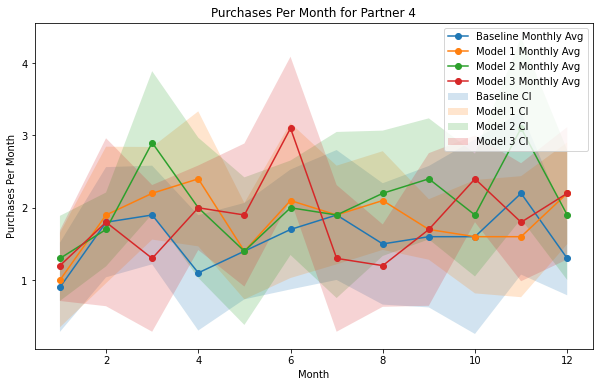

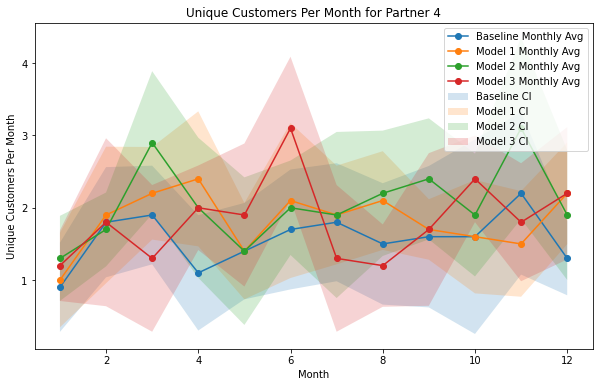

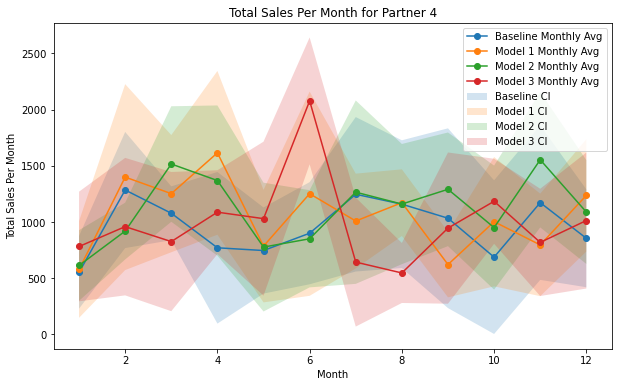

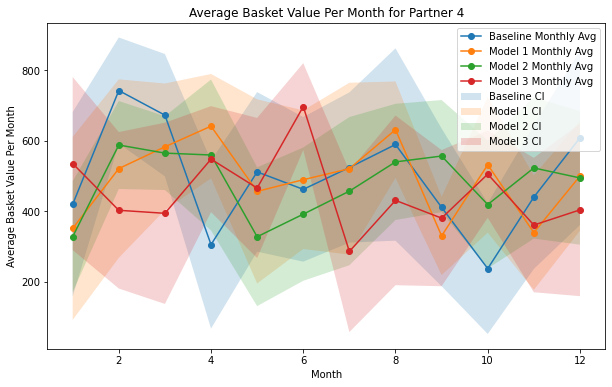

In [21]:
plot_metrics_with_confidence(sim_0_metrics, sim_1_metrics, sim_2_metrics, sim_3_metrics, "Partner 4")



In [ ]:
sim_2_metrics

{'Partner 1': {'Purchases Per Month': [[579,
    625,
    711,
    710,
    725,
    820,
    692,
    621,
    616,
    594,
    671,
    732],
   [648, 629, 651, 715, 716, 755, 851, 691, 686, 737, 761, 772],
   [625, 628, 670, 704, 739, 724, 702, 660, 719, 692, 764, 751],
   [604, 705, 645, 519, 530, 496, 510, 520, 536, 556, 560, 546],
   [632, 680, 630, 647, 736, 743, 582, 565, 550, 602, 591, 591],
   [582, 677, 679, 703, 696, 737, 747, 799, 789, 688, 649, 668],
   [604, 682, 719, 696, 739, 762, 782, 787, 772, 800, 815, 812],
   [617, 675, 691, 714, 722, 744, 744, 757, 775, 888, 797, 857],
   [636, 642, 710, 601, 569, 630, 585, 622, 610, 768, 662, 591],
   [620, 630, 673, 698, 809, 687, 848, 613, 648, 747, 573, 578],
   [683, 655, 654, 617, 567, 578, 566, 611, 627, 605, 617, 634],
   [633, 688, 685, 655, 649, 692, 638, 661, 620, 713, 600, 612],
   [460, 440, 513, 498, 521, 575, 603, 562, 579, 572, 588, 602],
   [613, 627, 720, 648, 657, 690, 712, 711, 678, 729, 758, 755],
   [583, 6